In [141]:
import pandas as pd
from scipy.stats import shapiro 
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
# Import the data

orig_df = pd.read_csv('../data/HG_FinnRisk.txt', sep="\t", decimal=',')
df = orig_df.copy(deep=True)
df

,Sample,Cohort,BL_AGE,DIAB_AGE,PREVAL_DIAB,INCIDENT_DIAB,DIAB_T2,INCIDENT_DIAB_T2,PREVAL_DIAB_T2,DIABETES,...,S0,S1,S2,S3,S4,G0,G1,G2,G3,G4
0,4002080252,FinnRisk,55.425,57.914,0,1,1,1,0,1,...,20.283231,22.250976,42.787746,12.390338,2.367405,5.591518,9.952926,65.662110,10.801767,6.913720
1,4002122536,FinnRisk,63.091,67.912,0,0,0,0,0,0,...,25.713805,20.716524,40.441785,10.990010,2.207924,12.985303,10.094260,60.134224,10.058022,5.752116
2,4004158639,FinnRisk,63.039,65.966,0,1,1,1,0,1,...,19.590076,19.764287,41.950454,15.955089,2.837085,9.428330,7.936387,58.555138,15.986374,6.992649
3,4005016134,FinnRisk,69.621,73.177,0,1,1,1,0,1,...,22.158784,22.398594,41.815866,11.325313,2.393041,8.691062,10.098506,63.139637,12.201526,4.750372
4,4005072554,FinnRisk,34.839,38.500,0,1,1,1,0,1,...,20.373851,22.320652,41.729478,12.659140,3.010846,8.142575,8.575747,63.082484,13.314909,5.914578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,8201319256,FinnRisk,72.939,74.478,0,1,1,1,0,1,...,14.620877,21.858393,46.587682,13.839056,3.208529,7.697855,5.397993,65.842189,13.630958,6.608456
70,8201319737,FinnRisk,61.993,71.718,0,0,0,0,0,0,...,24.924114,24.461817,37.979003,10.272909,2.446926,8.668266,11.347195,62.279094,11.513344,4.748123
71,8201335752,FinnRisk,46.637,56.537,0,0,0,0,0,0,...,24.907871,23.905185,38.701173,10.529598,2.033491,9.141776,10.698590,63.140974,10.934956,5.010190
72,8201344755,FinnRisk,68.912,78.111,0,1,1,1,0,1,...,23.096526,26.170355,37.417074,11.303001,2.104148,10.712715,8.556974,63.067076,10.716105,5.845915


In [143]:
# Drop redundant columns and derived traits

df_clean = df.drop(columns=["Sample","Cohort","DIAB_AGE","PREVAL_DIAB","INCIDENT_DIAB","DIAB_T2","INCIDENT_DIAB_T2","PREVAL_DIAB_T2","LB","HB","S0","S1","S2","S3","S4","G0","G1","G2","G3","G4"])
df_clean

,BL_AGE,DIABETES,GP1,GP2,GP3,GP4,GP5,GP6,GP7,GP8,...,GP37,GP38,GP39,GP40,GP41,GP42,GP43,GP44,GP45,GP46
0,55.425,1,0.016118,0.072337,0.002572,0.045732,3.306536,1.466415,0.056500,4.104061,...,1.574028,3.533020,0.435101,0.498498,0.407196,0.321716,0.528683,0.311149,0.486703,0.311959
1,63.091,0,0.021173,0.153304,0.005156,0.082791,9.825144,2.218289,0.064145,4.702867,...,1.468835,2.817054,0.352065,0.305025,0.367101,0.336453,0.517333,0.302512,0.406641,0.277884
2,63.039,1,0.029867,0.254652,0.008845,0.112243,5.682548,2.646903,0.097515,3.025506,...,2.270035,3.237520,0.440493,0.380561,0.530053,0.509171,0.696077,0.380045,0.441853,0.279887
3,69.621,1,0.032442,0.183741,0.009748,0.108015,5.281655,2.298598,0.105786,4.164279,...,1.470287,1.651568,0.387695,0.226472,0.405673,0.522430,0.645012,0.318333,0.279970,0.221623
4,34.839,1,0.023237,0.125931,0.005816,0.058770,4.914101,2.244814,0.049552,3.704350,...,1.779718,2.171635,0.378182,0.259946,0.502981,0.606240,0.828614,0.384596,0.434373,0.254043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,72.939,1,0.027266,0.127565,0.006394,0.121648,5.184831,1.581612,0.062864,1.842558,...,1.381881,2.526835,0.411248,0.347308,0.380211,0.768169,0.847621,0.479761,0.455312,0.277455
70,61.993,0,0.027380,0.300511,0.006148,0.110258,4.521746,2.783183,0.134617,4.795504,...,1.048636,1.724066,0.304114,0.188247,0.494815,0.509339,0.476596,0.394672,0.201768,0.369735
71,46.637,0,0.023312,0.453886,0.003816,0.131517,4.407034,2.777473,0.201509,4.409247,...,1.117534,2.420510,0.266629,0.212242,0.439485,0.340023,0.348504,0.356669,0.249731,0.299080
72,68.912,1,0.015276,0.149216,0.001344,0.149289,7.201589,2.374565,0.106164,3.415930,...,0.701030,2.925496,0.311306,0.413861,0.309195,0.499816,0.396500,0.355059,0.305574,0.238004


In [144]:
df_clean.describe()

,BL_AGE,DIABETES,GP1,GP2,GP3,GP4,GP5,GP6,GP7,GP8,...,GP37,GP38,GP39,GP40,GP41,GP42,GP43,GP44,GP45,GP46
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,...,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,59.645959,0.500000,0.021905,0.199061,0.005275,0.084139,5.644085,2.325705,0.096625,4.391050,...,1.413820,3.006389,0.363087,0.350207,0.411564,0.417520,0.529861,0.342308,0.392058,0.305299
std,8.980021,0.503413,0.005162,0.083115,0.002639,0.033090,1.874231,0.469489,0.033681,1.014292,...,0.366987,1.047620,0.072904,0.104397,0.071728,0.131429,0.138185,0.066516,0.140392,0.111495
min,34.839000,0.000000,0.012010,0.067592,0.001344,0.027821,1.278507,1.338454,0.038116,1.842558,...,0.701030,1.101391,0.229714,0.146552,0.270780,0.151155,0.202602,0.221847,0.153643,0.165655
25%,55.230000,0.000000,0.018990,0.141039,0.003515,0.063565,4.409381,1.956474,0.071055,3.776727,...,1.172460,2.281838,0.310866,0.263061,0.363107,0.326221,0.430801,0.292988,0.289325,0.238138
50%,60.735000,0.500000,0.021192,0.179876,0.004736,0.077773,5.370693,2.291228,0.095789,4.341939,...,1.353459,2.853174,0.352383,0.337521,0.400293,0.394745,0.516244,0.332637,0.377885,0.277065
75%,66.969750,1.000000,0.023298,0.248702,0.006407,0.103478,6.834949,2.560890,0.112311,4.854126,...,1.606099,3.523666,0.401980,0.413970,0.466097,0.509297,0.615108,0.388091,0.466914,0.333762
max,72.939000,1.000000,0.043081,0.453886,0.016457,0.258530,10.691199,3.909623,0.201509,7.539807,...,2.434932,5.598019,0.687446,0.576547,0.591792,0.768169,0.876797,0.540241,0.810265,0.705478


In [145]:
#Shapiro-Wilk Test for normality

features = df_clean.drop(columns=["DIABETES"])

abundance_stats = {"feature":[], "pval":[]}
for col in features.columns:
    stat, pval = shapiro(df_clean[col])
    abundance_stats["feature"].append(col)
    abundance_stats["pval"].append(pval)

pvals = pd.DataFrame(abundance_stats)
not_normal = pvals[pvals["pval"]<0.05].sort_values(by="pval")
not_normal

,feature,pval
4,GP4,2.478462e-07
22,GP22,5.151898e-07
46,GP46,5.503070e-07
1,GP1,4.349038e-05
39,GP39,1.388032e-04
3,GP3,1.484032e-04
36,GP36,2.097854e-04
15,GP15,5.874535e-04
35,GP35,8.621298e-04
0,BL_AGE,8.966957e-04


GP4


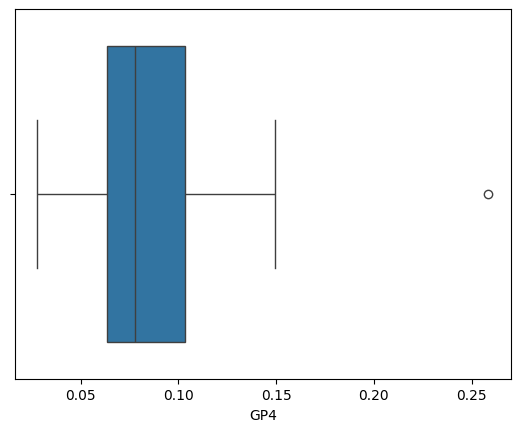

GP22


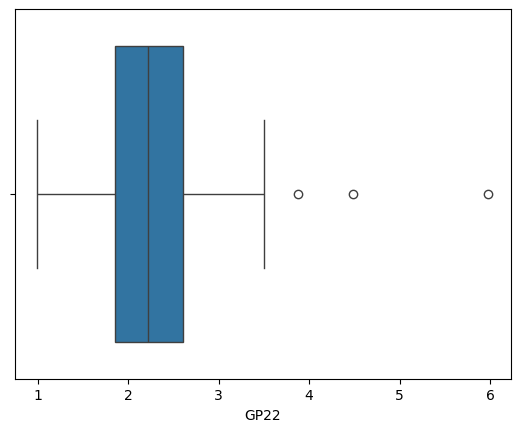

GP46


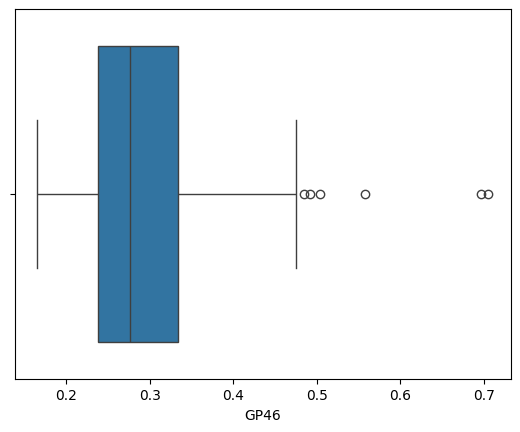

GP1


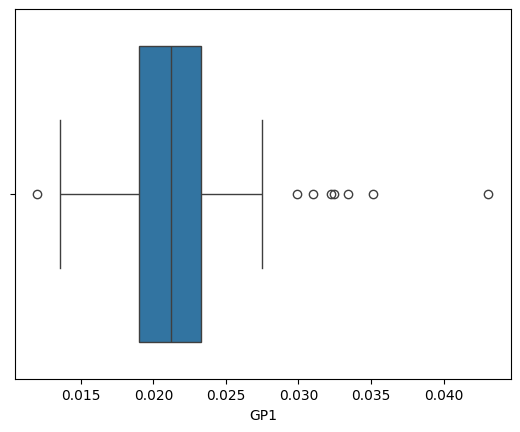

GP39


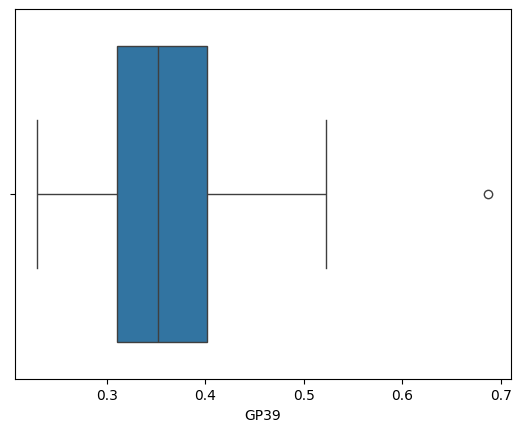

GP3


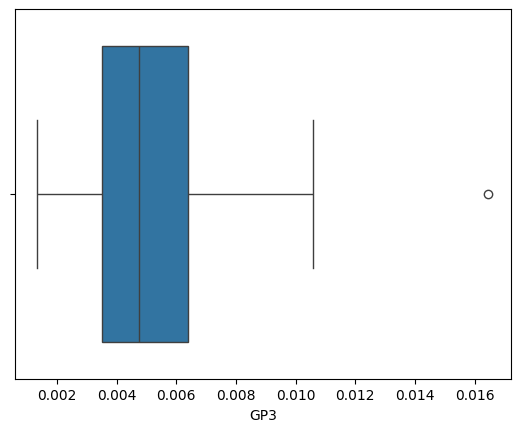

GP36


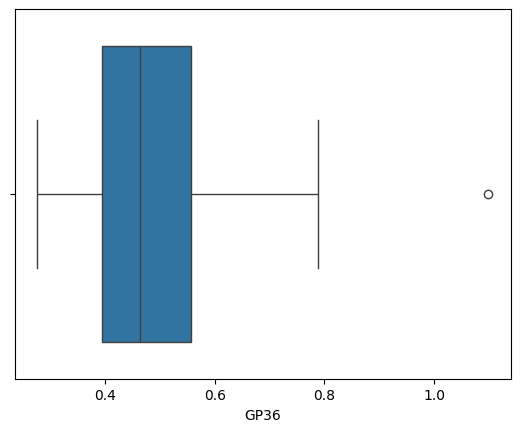

GP15


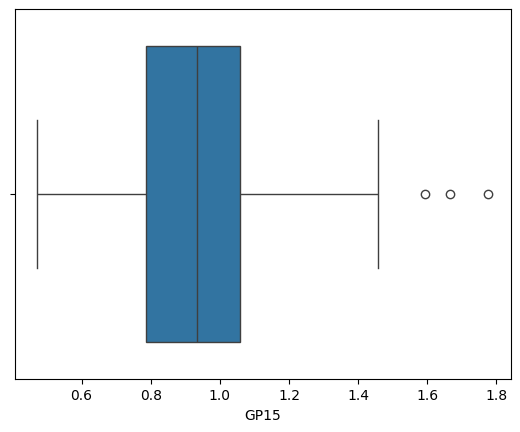

GP35


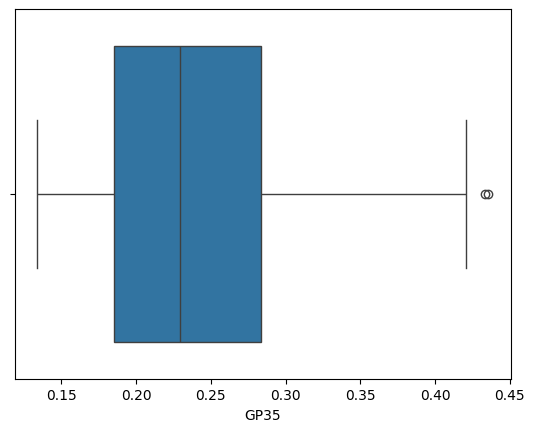

BL_AGE


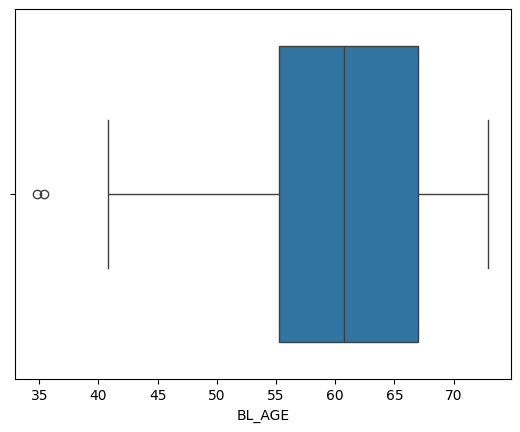

GP9


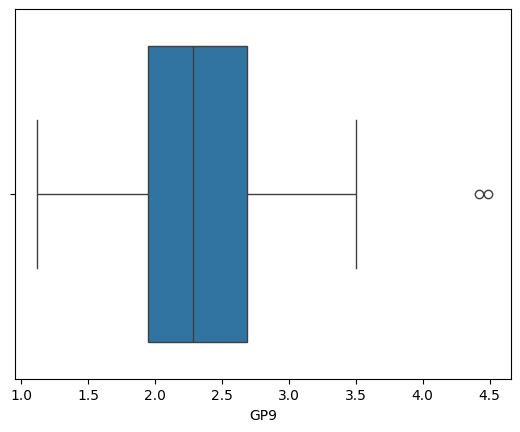

GP32


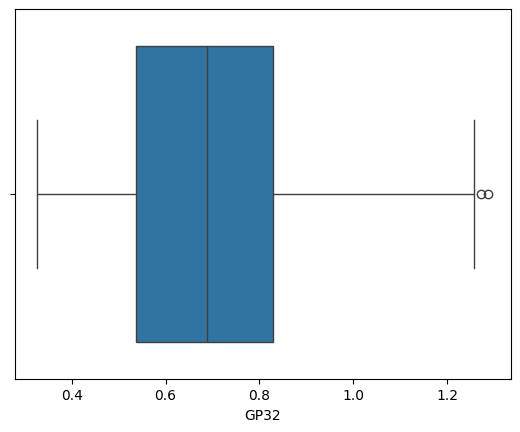

GP38


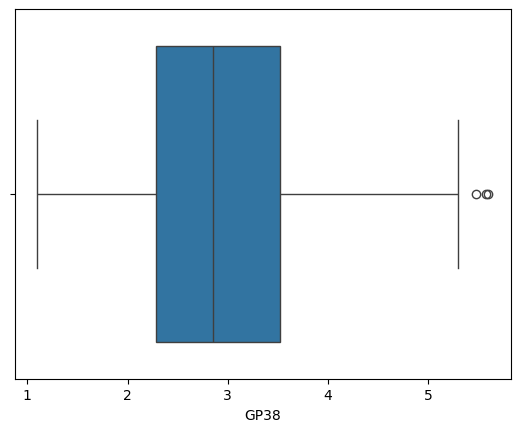

GP20


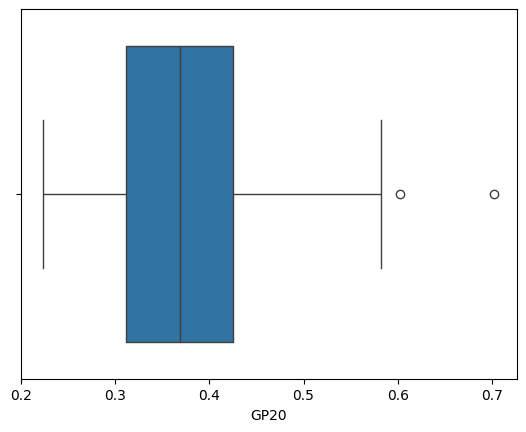

GP28


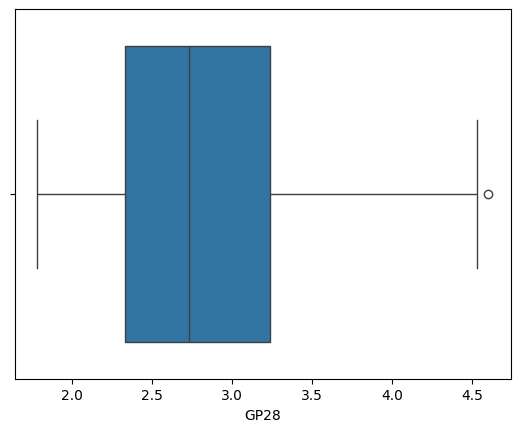

GP2


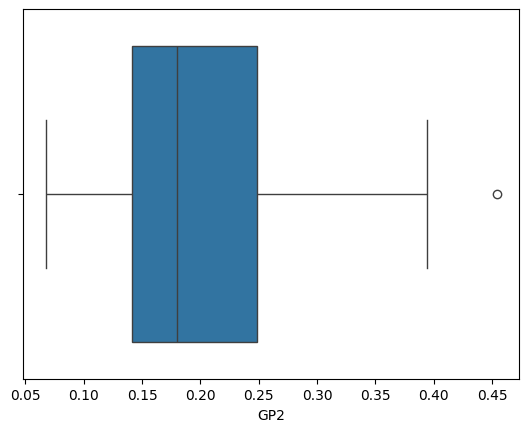

GP12


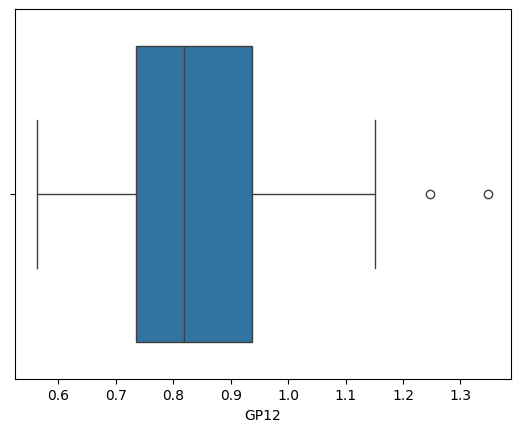

GP11


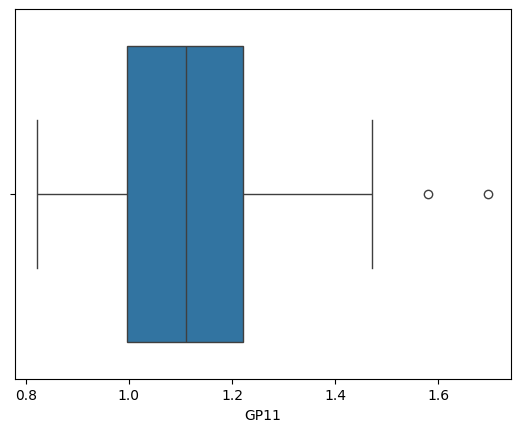

GP6


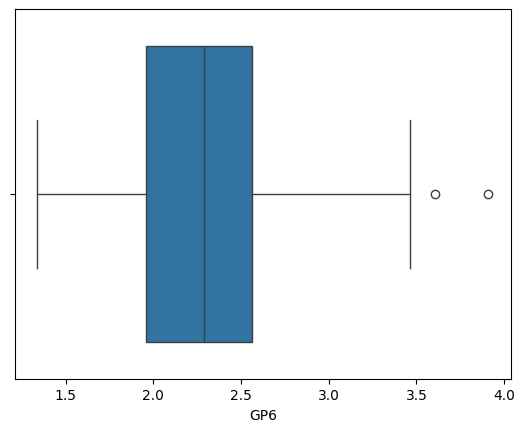

GP7


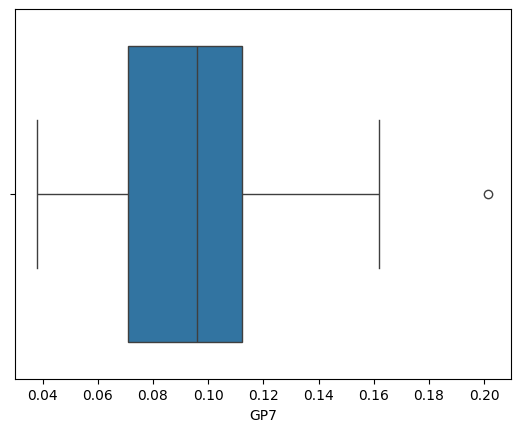

GP37


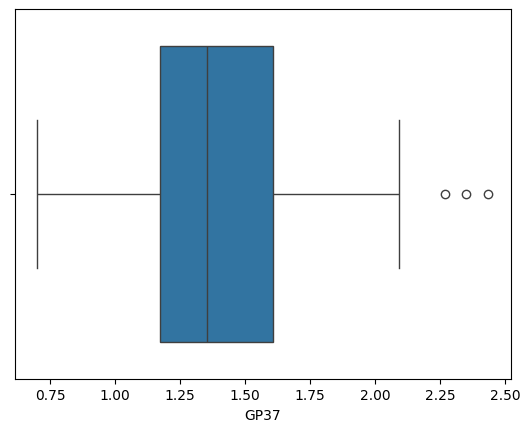

GP45


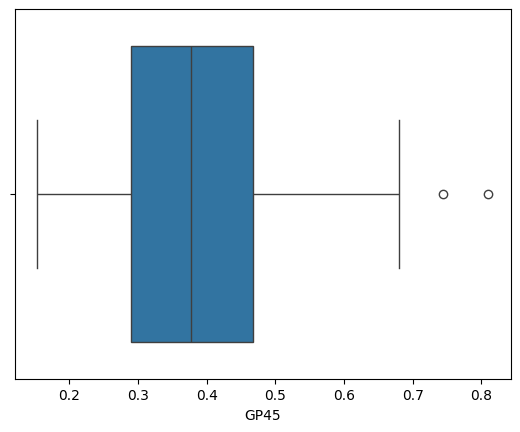

GP27


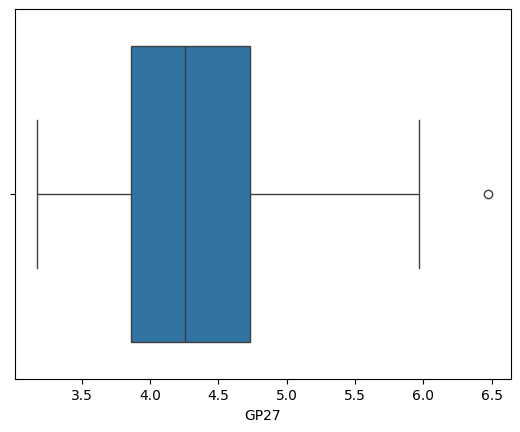

In [151]:
for col in not_normal.feature:
    print (col)
    sns.boxplot(df_clean, x=col)
    plt.show()

<Axes: >

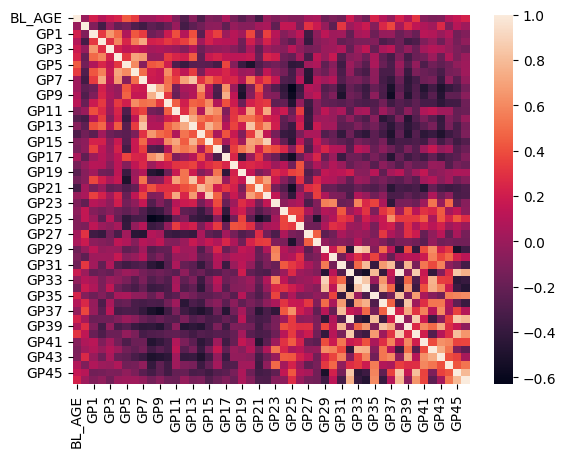

In [147]:
cor_df = pd.DataFrame(df_clean.corr())
sns.heatmap(cor_df)

In [148]:
cor_df

,BL_AGE,DIABETES,GP1,GP2,GP3,GP4,GP5,GP6,GP7,GP8,...,GP37,GP38,GP39,GP40,GP41,GP42,GP43,GP44,GP45,GP46
BL_AGE,1.000000,-0.011080,0.215070,0.100972,0.179108,0.232621,0.437040,0.331866,0.006872,0.006872,...,-0.025596,0.220332,0.069458,0.306703,-0.081603,-0.120206,-0.106417,0.084294,0.158782,0.223999
DIABETES,-0.011080,1.000000,-0.098478,-0.334988,-0.021785,-0.199089,-0.149453,-0.285703,-0.347253,-0.228738,...,0.374445,0.045016,0.276654,0.137264,0.072848,0.025298,0.255637,-0.106079,0.103427,0.012510
GP1,0.215070,-0.098478,1.000000,0.324871,0.651480,0.484518,0.079670,0.421859,0.334202,-0.167034,...,-0.016162,-0.183877,-0.096223,-0.195332,0.110958,0.085279,-0.008343,0.080748,-0.156222,-0.098738
GP2,0.100972,-0.334988,0.324871,1.000000,0.288627,0.585136,0.245192,0.561928,0.716473,0.214779,...,-0.239537,-0.166159,-0.339143,-0.294332,-0.101396,-0.012845,-0.169605,0.002532,-0.142832,-0.042473
GP3,0.179108,-0.021785,0.651480,0.288627,1.000000,0.224211,0.139945,0.177682,0.133144,0.044568,...,0.116836,-0.169810,-0.026189,-0.183491,0.028456,0.090168,0.059992,-0.017708,-0.108797,-0.156518
GP4,0.232621,-0.199089,0.484518,0.585136,0.224211,1.000000,0.313312,0.702826,0.661711,-0.018764,...,-0.324444,-0.100164,-0.326298,-0.178000,-0.150393,0.004240,-0.193291,0.073381,-0.120330,-0.004606
GP5,0.437040,-0.149453,0.079670,0.245192,0.139945,0.313312,1.000000,0.602564,-0.071341,0.425861,...,-0.303711,-0.001720,-0.262312,-0.032318,-0.292810,-0.152546,-0.225228,-0.152797,-0.043578,0.007879
GP6,0.331866,-0.285703,0.421859,0.561928,0.177682,0.702826,0.602564,1.000000,0.497338,0.199714,...,-0.311607,-0.066039,-0.377508,-0.126335,-0.180711,-0.221287,-0.311921,-0.145625,-0.119849,0.014454
GP7,0.006872,-0.347253,0.334202,0.716473,0.133144,0.661711,-0.071341,0.497338,1.000000,0.184516,...,-0.401590,-0.185249,-0.430953,-0.327615,-0.173090,-0.135809,-0.381386,-0.039482,-0.250321,-0.034052
GP8,0.006872,-0.228738,-0.167034,0.214779,0.044568,-0.018764,0.425861,0.199714,0.184516,1.000000,...,-0.514746,-0.251024,-0.417822,-0.288838,-0.471316,-0.346940,-0.500154,-0.395336,-0.335040,-0.147631


In [131]:
import numpy as np
abs(cor_df.replace(1.000000, np.nan)).describe()

,BL_AGE,DIABETES,GP1,GP2,GP3,GP4,GP5,GP6,GP7,GP8,...,GP37,GP38,GP39,GP40,GP41,GP42,GP43,GP44,GP45,GP46
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,...,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,0.140960,0.152630,0.174096,0.205878,0.109449,0.207960,0.228772,0.232572,0.283547,0.289362,...,0.311284,0.276548,0.315279,0.281320,0.268573,0.254932,0.289491,0.219761,0.290213,0.224000
std,0.098950,0.109184,0.147885,0.159611,0.108081,0.158968,0.147185,0.170890,0.196123,0.186826,...,0.193414,0.232683,0.207561,0.195182,0.168530,0.210729,0.205105,0.172165,0.203997,0.215279
min,0.006872,0.002214,0.000783,0.002171,0.000251,0.004240,0.001720,0.003562,0.006872,0.000728,...,0.016162,0.001720,0.026189,0.007159,0.007075,0.004240,0.008343,0.002532,0.043578,0.004606
25%,0.072742,0.052825,0.080209,0.098555,0.039397,0.123025,0.103568,0.123092,0.134477,0.146914,...,0.144800,0.122751,0.122316,0.176347,0.149821,0.091641,0.101929,0.062520,0.144950,0.065160
50%,0.117936,0.146421,0.122188,0.169619,0.083730,0.180809,0.225228,0.180711,0.251097,0.274847,...,0.311607,0.232112,0.316834,0.268097,0.238462,0.199853,0.311921,0.206212,0.234913,0.152418
75%,0.199552,0.234031,0.231524,0.291480,0.163164,0.244780,0.324430,0.316330,0.370348,0.416499,...,0.444599,0.329053,0.428985,0.305064,0.390841,0.380834,0.424896,0.345680,0.355204,0.313642
max,0.437040,0.374445,0.651480,0.716473,0.651480,0.702826,0.602564,0.702826,0.831140,0.751304,...,0.801697,0.978729,0.830329,0.865950,0.626713,0.761423,0.733821,0.586708,0.846900,0.786182


In [132]:
abs(cor_df.replace(1.000000, np.nan)).describe().iloc[-1]

BL_AGE      0.437040
DIABETES    0.374445
GP1         0.651480
GP2         0.716473
GP3         0.651480
GP4         0.702826
GP5         0.602564
GP6         0.702826
GP7         0.831140
GP8         0.751304
GP9         0.751304
GP10        0.608321
GP11        0.717827
GP12        0.730015
GP13        0.831140
GP14        0.797059
GP15        0.875435
GP16        0.662080
GP17        0.742614
GP18        0.412967
GP19        0.523847
GP20        0.828925
GP21        0.797059
GP22        0.875435
GP23        0.594089
GP24        0.437057
GP25        0.629766
GP26        0.412967
GP27        0.462729
GP28        0.494436
GP29        0.889814
GP30        0.594089
GP31        0.801697
GP32        0.978729
GP33        0.889814
GP34        0.841405
GP35        0.809056
GP36        0.830329
GP37        0.801697
GP38        0.978729
GP39        0.830329
GP40        0.865950
GP41        0.626713
GP42        0.761423
GP43        0.733821
GP44        0.586708
GP45        0.846900
GP46        0

In [133]:
glycan_dict = {              
               'GP32_33':['GP32','GP33'],
               'GP38_39':['GP38','GP39'],
               'GP41_43':['GP41','GP42','GP43']
               }

df_combined = pd.DataFrame()

for key,value in glycan_dict.items():
    df_combined[key] = df_clean[value].sum(axis=1)

In [134]:
df_corr = df_clean.join(df_combined)
df_corr = df_corr.drop(columns=['GP32','GP33','GP38','GP39','GP41','GP42','GP43'])
df_corr

,BL_AGE,DIABETES,GP1,GP2,GP3,GP4,GP5,GP6,GP7,GP8,...,GP35,GP36,GP37,GP40,GP44,GP45,GP46,GP32_33,GP38_39,GP41_43
0,55.425,1,0.016118,0.072337,0.002572,0.045732,3.306536,1.466415,0.056500,4.104061,...,0.223746,0.550068,1.574028,0.498498,0.311149,0.486703,0.311959,1.445743,3.968121,1.257595
1,63.091,0,0.021173,0.153304,0.005156,0.082791,9.825144,2.218289,0.064145,4.702867,...,0.186489,0.417431,1.468835,0.305025,0.302512,0.406641,0.277884,1.191990,3.169119,1.220887
2,63.039,1,0.029867,0.254652,0.008845,0.112243,5.682548,2.646903,0.097515,3.025506,...,0.246884,0.604105,2.270035,0.380561,0.380045,0.441853,0.279887,1.529264,3.678013,1.735300
3,69.621,1,0.032442,0.183741,0.009748,0.108015,5.281655,2.298598,0.105786,4.164279,...,0.159435,0.559705,1.470287,0.226472,0.318333,0.279970,0.221623,1.107306,2.039263,1.573115
4,34.839,1,0.023237,0.125931,0.005816,0.058770,4.914101,2.244814,0.049552,3.704350,...,0.176019,0.477972,1.779718,0.259946,0.384596,0.434373,0.254043,1.187869,2.549818,1.937835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,72.939,1,0.027266,0.127565,0.006394,0.121648,5.184831,1.581612,0.062864,1.842558,...,0.258523,0.738678,1.381881,0.347308,0.479761,0.455312,0.277455,1.418769,2.938083,1.996001
70,61.993,0,0.027380,0.300511,0.006148,0.110258,4.521746,2.783183,0.134617,4.795504,...,0.176834,0.393042,1.048636,0.188247,0.394672,0.201768,0.369735,1.131761,2.028180,1.480751
71,46.637,0,0.023312,0.453886,0.003816,0.131517,4.407034,2.777473,0.201509,4.409247,...,0.226653,0.315930,1.117534,0.212242,0.356669,0.249731,0.299080,1.212536,2.687139,1.128012
72,68.912,1,0.015276,0.149216,0.001344,0.149289,7.201589,2.374565,0.106164,3.415930,...,0.376146,0.525807,0.701030,0.413861,0.355059,0.305574,0.238004,1.656108,3.236802,1.205511


In [135]:
cor_df = pd.DataFrame(df_corr.corr())
abs(cor_df.replace(1.000000, np.nan)).describe().iloc[-1]

BL_AGE      0.437040
DIABETES    0.374445
GP1         0.651480
GP2         0.716473
GP3         0.651480
GP4         0.702826
GP5         0.602564
GP6         0.702826
GP7         0.831140
GP8         0.751304
GP9         0.751304
GP10        0.608321
GP11        0.717827
GP12        0.730015
GP13        0.831140
GP14        0.797059
GP15        0.875435
GP16        0.662080
GP17        0.742614
GP18        0.412967
GP19        0.523847
GP20        0.828925
GP21        0.797059
GP22        0.875435
GP23        0.594089
GP24        0.430687
GP25        0.629766
GP26        0.412967
GP27        0.462729
GP28        0.494436
GP29        0.808110
GP30        0.594089
GP31        0.801697
GP34        0.808110
GP35        0.853840
GP36        0.748777
GP37        0.801697
GP40        0.884328
GP44        0.559661
GP45        0.858492
GP46        0.786182
GP32_33     0.853840
GP38_39     0.884328
GP41_43     0.697682
Name: max, dtype: float64

In [136]:
glycan_dict = {                 
                'LB_SO':['GP1','GP2','GP3','GP4','GP5','GP6','GP7','GP8','GP9','GP10','GP11','GP12','GP13','GP14','GP15','GP24'],
                'LB_S1':['GP16','GP17','GP18','GP19','GP20','GP21','GP22'],
                'LB_S2':['GP23','GP25','GP26','GP27','GP28'],
                'HB_S1':['GP30'],
                'HB_S2':['GP29','GP31'],
                'HB_S3':['GP32','GP33','GP34','GP35','GP36','GP37','GP38','GP39','GP40'],
                'HB_S4':['GP41','GP42','GP43','GP44','GP45','GP46'],
               }

df_combined = pd.DataFrame()

for key,value in glycan_dict.items():
    df_combined[key] = df_clean[value].sum(axis=1)

In [137]:
df_combined

,LB_SO,LB_S1,LB_S2,HB_S1,HB_S2,HB_S3,HB_S4
0,21.416539,19.401808,41.466167,0.079696,2.878048,12.390338,2.367405
1,26.766238,17.913468,39.510156,0.070048,2.542156,10.990010,2.207924
2,20.753897,16.482271,39.784809,0.096990,4.089859,15.955089,2.837085
3,23.509438,18.943104,40.595560,0.091598,3.141948,11.325313,2.393041
4,21.425581,18.569010,40.775923,0.093967,3.465532,12.659140,3.010846
...,...,...,...,...,...,...,...
69,15.704589,17.401746,46.654252,0.114536,3.077293,13.839056,3.208529
70,26.204368,20.465549,37.068616,0.084769,3.456862,10.272909,2.446926
71,25.806728,19.928273,38.319853,0.077318,3.304739,10.529598,2.033491
72,24.223173,21.609643,37.605165,0.091104,3.063767,11.303001,2.104148


In [138]:
cor_df = pd.DataFrame(df_combined.corr())
abs(cor_df.replace(1.000000, np.nan)).describe().iloc[-1]

LB_SO    0.819334
LB_S1    0.504692
LB_S2    0.819334
HB_S1    0.478561
HB_S2    0.547773
HB_S3    0.744233
HB_S4    0.645360
Name: max, dtype: float64